In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from google.colab import files

In [20]:
# Upload file dari lokal ke Google Colab
uploaded = files.upload()


Saving healthcare_dataset.csv to healthcare_dataset (2).csv


In [21]:
# Baca dataset
df = pd.read_csv("healthcare_dataset.csv")

In [22]:
# Tampilkan beberapa baris pertama dataset
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


In [23]:
# Pembersihan Data
# Menangani nilai yang hilang (contoh: mengganti nilai yang hilang dengan mean)
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [32]:
# Transformasi Data
# One-hot encode variabel kategorikal
categorical_cols = ['Gender', 'Blood Type', 'Admission Type']
numerical_cols = ['Age']

In [33]:
# Tentukan transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

In [34]:
# Tentukan model
model = LinearRegression()

In [35]:
# Buat pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])

In [36]:
# Pisahkan fitur dan variabel target
X = df.drop('Billing Amount', axis=1)
y = df['Billing Amount']

In [37]:
# Bagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# Latih model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Gender', 'Blood Type',
                                                   'Admission Type'])])),
                ('model', LinearRegression())])

In [39]:
# Buat prediksi pada set pengujian
y_pred = pipeline.predict(X_test)

In [40]:
# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [41]:
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 199751639.34774715
R-squared: 0.0006566333766484522


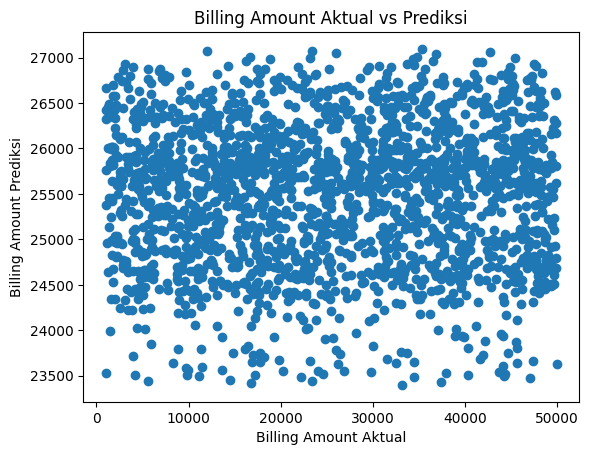

In [42]:
# Visualisasikan prediksi
plt.scatter(y_test, y_pred)
plt.xlabel("Billing Amount Aktual")
plt.ylabel("Billing Amount Prediksi")
plt.title("Billing Amount Aktual vs Prediksi")
plt.show()